In [27]:
# The problem we will tackle is predicting the max temperature for tomorrow in our city 
# using one year of past weather data.

In [28]:
import pandas as pd

features = pd.read_csv('temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [29]:
features.dtypes

year                int64
month               int64
day                 int64
week               object
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
dtype: object

In [30]:
print('The shape of the dataset:', features.shape)

features.isna().sum()

The shape of the dataset: (348, 12)


year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [32]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)

features.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [33]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf =  RandomForestRegressor(n_estimators = 1000,random_state=42)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

In [41]:
# evaluate the performance

from sklearn import metrics

print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE):",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error (MAE): 3.8731954022988506
Mean Squared Error (MSE): 26.02690937931034
Root Mean Squared Error (RMSE): 5.101657512937373


In [42]:
print("R^2 score:", metrics.r2_score(y_test,y_pred))

R^2 score: 0.8128487257488989


In [43]:
# Further work

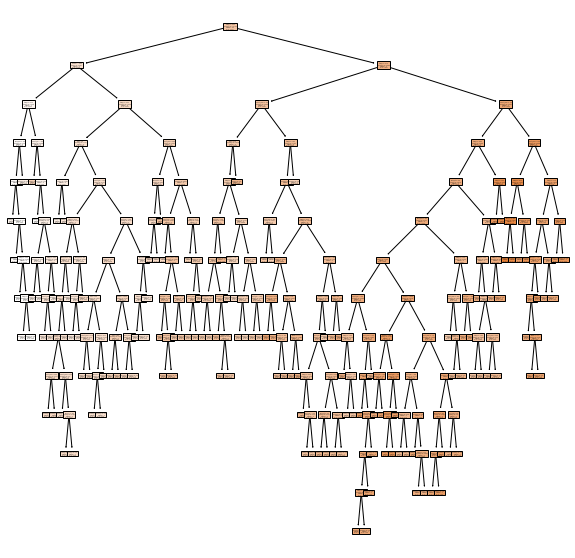

In [64]:
# visualizing a single tree
import matplotlib.pyplot as plt 
from sklearn import tree

estimator = rf.estimators_[5]

plt.figure(figsize=(10,10))
_ = tree.plot_tree(estimator, feature_names=feature_list, filled=True)
plt.show()

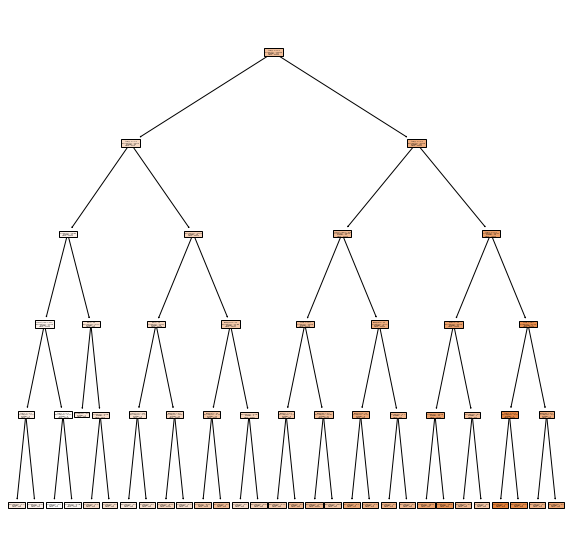

In [65]:
# a smaller size tree

rf_small = RandomForestRegressor(n_estimators = 10,max_depth = 5)
rf_small.fit(X_train,y_train)
estimator_small = rf_small.estimators_[5]

plt.figure(figsize=(10,10))
_ = tree.plot_tree(estimator_small,feature_names = feature_list,filled=True)
plt.show()

In [72]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year                 Importance: 0.0
Variable: month                Importance: 0.01
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [73]:
# temp_1 and average are the most two important features

In [75]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

important_indices = [feature_list.index('temp_1'),feature_list.index('average')]

# only select the data within important columns
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

rf_most_important.fit(train_important, train_labels)

predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.92 degrees.


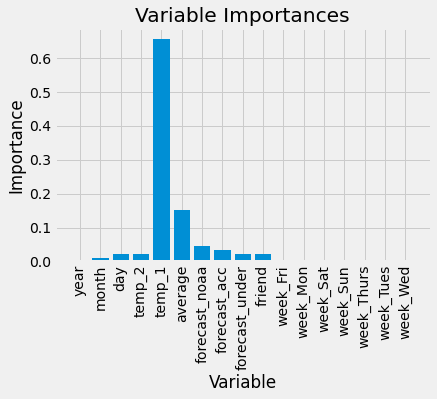

In [78]:
# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');